# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Load

In [2]:
features = pd.read_csv("../data/features.csv")
patient_notes = pd.read_csv("../data/patient_notes.csv")
sample_submission = pd.read_csv("../data/sample_submission.csv")
test = pd.read_csv("../data/test.csv")
train = pd.read_csv("../data/train.csv")

# train

In [3]:
train.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [4]:
train.shape

(14300, 6)

## train id

In [5]:
train["id"].nunique()

14300

In [6]:
id_split_list = train["id"].apply(lambda x: x.split("_"))

In [7]:
id_split_list[id_split_list.apply(lambda x: '00016'in x)]

0     [00016, 000]
1     [00016, 001]
2     [00016, 002]
3     [00016, 003]
4     [00016, 004]
5     [00016, 005]
6     [00016, 006]
7     [00016, 007]
8     [00016, 008]
9     [00016, 009]
10    [00016, 010]
11    [00016, 011]
12    [00016, 012]
Name: id, dtype: object

In [8]:
def count_num(id):
    return sum(id_split_list.apply(lambda x: '00041'in x))

# 最初のidをsetで持つ
first_id_set = set(id_split_list.apply(lambda x: x[0]).tolist())

# 各idの個数を計算し、それをsetにする
set([count_num(first_id) for first_id in first_id_set])

{13}

In [9]:
# 各idに対して、13個ずつデータを持っている

## train case_num

In [10]:
train["case_num"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
train["case_num"].value_counts()

5    1800
8    1800
2    1700
9    1700
3    1600
0    1300
1    1300
6    1200
4    1000
7     900
Name: case_num, dtype: int64

## train pn_num

In [12]:
train["pn_num"].nunique()

1000

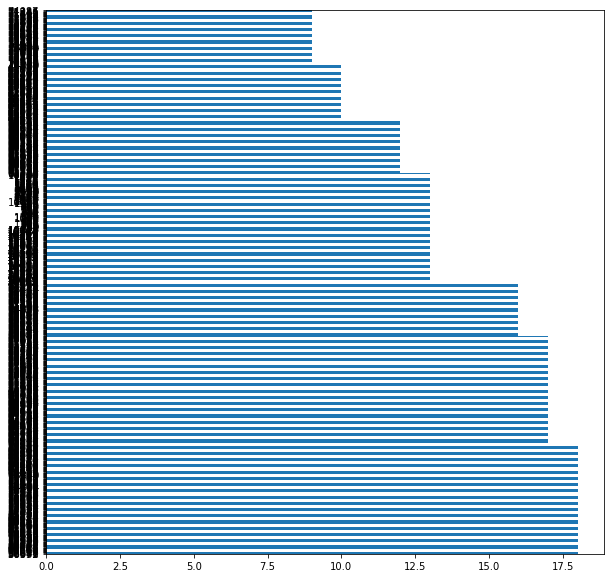

In [13]:
plt.figure(figsize=(10,10))
train["pn_num"].value_counts().plot(kind='barh');

In [14]:
# patient note毎にtrainの中での数は7段階で決まっている

## train feature_num

In [15]:
train["feature_num"].nunique()

143

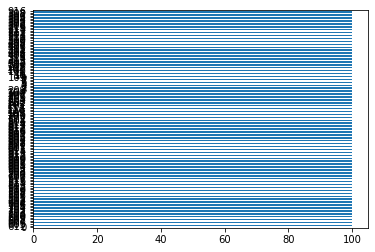

In [16]:
train["feature_num"].value_counts().plot(kind='barh');

In [17]:
# 各feature_numに対して、100弱のデータがtrainには存在する

## train annotation

In [18]:
train["annotation"].apply(lambda x: len(x) -2 ).describe()

count    14300.000000
mean        16.177902
std         20.343644
min          0.000000
25%          0.000000
50%         11.000000
75%         23.000000
max        296.000000
Name: annotation, dtype: float64

In [19]:
# 最大でannotationされている文字は296文字

In [57]:
train["annotation"].apply(lambda x: len(x.split())).describe()

count    14300.000000
mean         2.795734
std          2.982528
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         52.000000
Name: annotation, dtype: float64

In [ ]:
# 単語数の平均は2.8単語、最大は52単語

In [21]:
sum(train["annotation"].apply(lambda x: len(x) -2 ) == 0)

4399

In [27]:
# 14300データ中、annotationがないのは4399データ

# train location

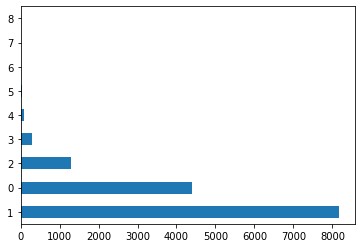

In [54]:
import ast
train["location"].apply(lambda x: len(ast.literal_eval(x))).value_counts().plot(kind='barh');

In [ ]:
# annotaionの数はほとんどが1つ。最大で8つ

In [58]:
train["location"]

0                 ['696 724']
1                 ['668 693']
2                 ['203 217']
3        ['70 91', '176 183']
4                 ['222 258']
                 ...         
14295                      []
14296                      []
14297             ['274 282']
14298             ['421 437']
14299             ['314 330']
Name: location, Length: 14300, dtype: object